<a href="https://colab.research.google.com/github/Renita1206/Titanic-Dataset/blob/main/TitanicContest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("/content/train.csv")

In [ ]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
data.shape

(891, 12)

In [ ]:
data = data.drop("Cabin", axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data.Age = data.Age.fillna(data.Age.median())

In [ ]:
def encodeSex(x):
  if x=="male":
    return 0
  else:
    return 1

In [ ]:
data.Sex = data.Sex.apply(encodeSex)

In [ ]:
def encodeEmbarked(x):
  if x=="S":
    return 3
  elif x=="Q":
    return 2
  else:
    return 1

In [ ]:
data.Embarked = data.Embarked.apply(encodeEmbarked)

In [ ]:
import math

def fare(x):
  if x>=2:
    return math.log(x)
  else:
    return 0

In [ ]:
data.Fare = data.Fare.apply(fare)

In [ ]:
data = data.drop("Name", axis=1)

In [ ]:
data.Ticket.nunique()

681

In [ ]:
data = data.drop("Ticket", axis=1)

In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013078
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.174199
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.170334
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,-0.115513
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.027650
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.070653
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,0.042325
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.229304
Embarked,0.013078,-0.174199,0.170334,-0.115513,-0.027650,0.070653,0.042325,-0.229304,1.000000


In [ ]:
#data = data.drop("SibSp", axis=1)

In [ ]:
#data = data.drop("Parch", axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,1.981001,3
1,2,1,1,1,38.0,1,0,4.266662,1
2,3,1,3,1,26.0,0,0,2.070022,3
3,4,1,1,1,35.0,1,0,3.972177,3
4,5,0,3,0,35.0,0,0,2.085672,3


In [ ]:
x=data.drop("Survived",axis=1) #features
y=data["Survived"] #target variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

## Logistic Regression Model

In [ ]:
#build the model and train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predic = model.predict(x_test)
report = classification_report(y_test,predic)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [ ]:
accuracy_score(y_test, predic)

0.8059701492537313

In [ ]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.60%


In [ ]:
from sklearn import metrics
y_pred_p = model.predict_proba(x_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_p)
print(auc)

0.8778332472599989


## SGD 

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="modified_huber", shuffle=True, random_state=101) 
model.fit(x_train, y_train)

SGDClassifier(loss='modified_huber', random_state=101)

In [ ]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.28%


In [ ]:
from sklearn import metrics
y_pred_p = model.predict_proba(x_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_p)
print(auc)

0.5066850289780226


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 2000)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=2000)

In [ ]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.72%


In [ ]:
from sklearn import metrics
y_pred_p = model.predict_proba(x_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_p)
print(auc)

0.8790956561657198


## XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier()

In [ ]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.21%


In [ ]:
from sklearn import metrics
y_pred_p = model.predict_proba(x_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_p)
print(auc)

0.8711482182819763


## ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=8, units=8, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=32, kernel_initializer="uniform"))
classifier.add(Dropout(0.4))
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=classifier.fit(x_train, y_train, batch_size = 10, epochs = 120,
    validation_split=0.1,verbose = 1,shuffle=True)

Epoch 1/120
56/56 [==============================] - 1s 6ms/step - loss: 0.6876 - accuracy: 0.6000 - val_loss: 0.6654 - val_accuracy: 0.6984
Epoch 2/120
56/56 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.6214 - val_loss: 0.6358 - val_accuracy: 0.6984
Epoch 3/120
56/56 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.6214 - val_loss: 0.6393 - val_accuracy: 0.6984
Epoch 4/120
56/56 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.6214 - val_loss: 0.6372 - val_accuracy: 0.6984
Epoch 5/120
56/56 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6214 - val_loss: 0.6369 - val_accuracy: 0.6984
Epoch 6/120
56/56 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.6214 - val_loss: 0.6347 - val_accuracy: 0.6984
Epoch 7/120
56/56 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.6214 - val_loss: 0.6350 - val_accuracy: 0.6984
Epoch 8/120
5

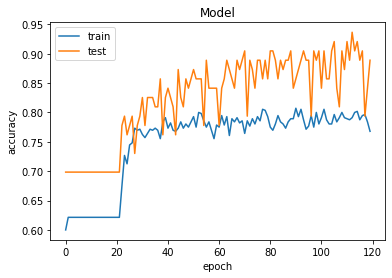

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

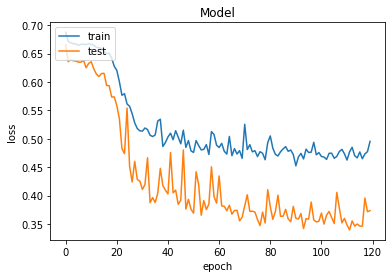

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Test

In [ ]:
test=pd.read_csv("/content/test.csv")

In [ ]:
test = test.drop("Cabin", axis=1)
test = test.drop("Name", axis=1)
test = test.drop("Ticket", axis=1)

In [ ]:
test.Age = test.Age.fillna(data.Age.median())

In [ ]:
test.Fare = test.Fare.fillna(data.Fare.median())

In [ ]:
test.Embarked = test.Embarked.apply(encodeEmbarked)

In [ ]:
test.Sex = test.Sex.apply(encodeSex)

In [ ]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,3
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,3
4,896,3,1,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
413,1305,3,0,28.0,0,0,8.0500,3
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,3
416,1308,3,0,28.0,0,0,8.0500,3


In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
y_pred = classifier.predict(test)
#Y_pred = classifier.predict(testdf)

In [ ]:
y_pred.shape

(418, 1)

In [ ]:
l=[]
for i in y_pred:
  l.append(i[0])

In [ ]:
arr = np.array(l)

In [ ]:
#d = np.array(a)
s = pd.Series(arr)

In [ ]:
frame = { 'PassengerId': test['PassengerId'], 'Survived': "0"}
result = pd.DataFrame(frame)

In [ ]:
result['Survived'] = s

In [ ]:
result.head(5)

,PassengerId,Survived
0,892,0.341187
1,893,0.602349
2,894,0.465638
3,895,0.366790
4,896,0.908004


In [ ]:
result.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.733942
std,120.810458,0.255514
min,892.000000,0.166241
25%,996.250000,0.382140
50%,1100.500000,0.908004
75%,1204.750000,0.908004
max,1309.000000,0.908004


In [ ]:
result['Survived'] = result['Survived'].apply(lambda row: 1 if row > 0.5 else 0)

In [ ]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
result[result["Survived"]==0].shape[0]

116

In [ ]:
result.to_csv("submission.csv")

Random Forest performed best of all three with a score 0f 0.79